# Module 3: Example of boosting

In this notebook, we will use the `AdaBoostClassifier` algorithm implemented in `scikit-learn` to create to classify the instances in the Iris flower dataset.


Let's import the required classes:

In [1]:
# Import packages
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Now, we load the data:

In [2]:
# Import data
iris = datasets.load_iris()
x = iris.data
y = iris.target

And split in train and test:

In [3]:
# Split train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

It's normally a good practice to check that the data you have is what you expected. Let's see the shape of our data:

In [4]:
print('xtrain shape: ', xtrain.shape)
print('ytrain shape: ', xtrain.shape)
print('xtest shape: ', xtest.shape)
print('ytest shape: ', xtest.shape)

xtrain shape:  (100, 4)
ytrain shape:  (100, 4)
xtest shape:  (50, 4)
ytest shape:  (50, 4)


We will now create the classifier. To do so, we first need to create our base classifier using the `DecisionTree` class, and then use the `AdaBoostClassifier` class to implement the boosting process itself.

The `AdaBoostClassifier` class has some attributes that we can tune to specify the type of classifier used as base, the number of base classifiers or the learning rate.

```
base_estimator: object, default=None
The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes. If None, then the base estimator is DecisionTreeClassifier initialized with max_depth=1.

n_estimators: int, default=50
The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

learning_rate: float, default=1.
Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

...
```

In [5]:
base_model = DecisionTreeClassifier(random_state=42)
boosting_model = AdaBoostClassifier(base_estimator=base_model, n_estimators=10, random_state=42)

Let's check the behaviour of the DecisionTree model and the one leveraging Boosting.

In [6]:
print('5-fold cross validation:\n')

labels = ['Decision Tree', 'Boosting']

for clf, label in zip([base_model, boosting_model], labels):

    scores = model_selection.cross_val_score(clf, xtrain, ytrain, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.91 (+/- 0.07) [Decision Tree]
Accuracy: 0.93 (+/- 0.07) [Boosting]


As was expected, the model leveraging Boosting improves the accuracy of the vanila Decision Tree.

Let's predict the labels for the test set:

In [7]:
# Predict Output 
boosting_model.fit(xtrain, ytrain)
preds = boosting_model.predict(xtest)

Let's see the result. We'll compute the confusion matrix, which contains information about true positives/negatives and false positives/negatives

Text(89.18, 0.5, 'Predicted')

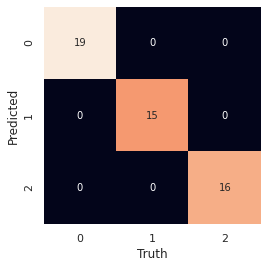

In [8]:
# Plot Confusion Matrix
mat = confusion_matrix(preds, ytest)
names = np.unique(preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')